In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statistics
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/ My Drive/Colab_TA/Dataset.csv", usecols=["Tanggal", "Kurs Jual"] )
df['Tanggal']= pd.to_datetime(df.Tanggal)
df

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
...,...,...
2704,2021-12-27,16202.12
2705,2021-12-28,16174.64
2706,2021-12-29,16202.59
2707,2021-12-30,16182.85


In [4]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
5,2011-01-10,11723.36
6,2011-01-11,11834.54
7,2011-01-12,11831.54
8,2011-01-13,11923.25
9,2011-01-14,12144.12


# Visualisasi Data

Text(0, 0.5, 'Kurs Jual')

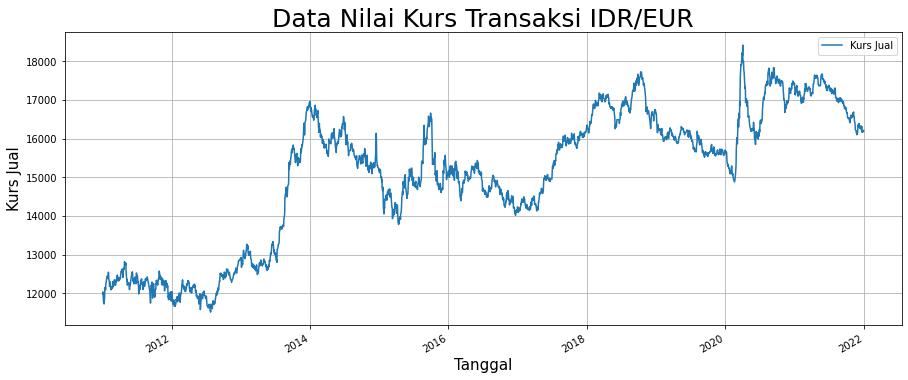

In [5]:
df.plot(x='Tanggal', y='Kurs Jual', grid='True', figsize=(15,6))
plt.title('Data Nilai Kurs Transaksi IDR/EUR', fontsize = 25)
plt.xlabel('Tanggal', fontsize = 15)
plt.ylabel('Kurs Jual', fontsize = 15)

### Visualisasi Data (Per Bulan) 

In [6]:
vis = px.line(df, x="Tanggal", y="Kurs Jual", title="Data Kurs Transaksi IDR/EUR")
vis.update_xaxes(dtick="M1", tickformat="%b\t%Y", ticklabelmode="period")
vis.update_layout(autosize=False, width=1600, height=850)
vis.show()

# Menentukan independent Variabel (X) and dependent Variabel (Y)

### Kurs Jual (Dataset ) 

In [7]:
Kurs_Jual = np.array(df['Kurs Jual'])
Kurs_Jual = Kurs_Jual.reshape(-1,1)
print(Kurs_Jual)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


### Menentukan X dan y 

In [8]:
#Menghapus kolom tabel tanggal
df.drop(['Tanggal'],axis=1,inplace=True)
df

,Kurs Jual
0,11983.50
1,12035.82
2,11993.59
3,11877.25
4,11778.29
5,11723.36
6,11834.54
7,11831.54
8,11923.25
9,12144.12


In [9]:
#Menentukan VariabeL untuk memprediksi 100 hari ke depan
prediction_future = 100
#Membuat variabel dependent atau target prediksi (kolom)  
df['Variabel Dependent (y)'] = df['Kurs Jual'].shift(prediction_future).fillna(pd.Series(reversed(df['Kurs Jual'])))
df

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


In [10]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


### Variabel Independent (x) 

In [11]:
#Membuat (mengambil hanya kolom kurs Jual ) Variabel Independent (X)
X = np.array(df.drop(['Variabel Dependent (y)'], axis=1))
print(X)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


In [12]:
X.shape

(2709, 1)

### Variabel Independent (y)

In [13]:
#Membuat (mengambil hanya kolom variabel dependent (y))
y = np.array(df['Variabel Dependent (y)'])
y=y.reshape(-1,1)
print(y)

[[16208.9 ]
 [16182.85]
 [16202.59]
 ...
 [17061.51]
 [17058.98]
 [16984.4 ]]


In [14]:
y.shape

(2709, 1)

### 100 hari Data Terakhir

In [15]:
#Membuat variabel prediction_days_array yang sama dengan 100 baris terakhir dari kumpulan dataset asli
actual_100days_array = np.array(df.drop(['Variabel Dependent (y)'],axis = 1))[-prediction_future:]
                                 
print(actual_100days_array)

[[16967.78]
 [16990.17]
 [16980.31]
 [17040.91]
 [16943.78]
 [16928.42]
 [16971.15]
 [16994.79]
 [16966.5 ]
 [17016.94]
 [17052.06]
 [17045.56]
 [17050.46]
 [16999.99]
 [16962.36]
 [17001.86]
 [17018.18]
 [16980.48]
 [16945.13]
 [16956.76]
 [16972.5 ]
 [16936.63]
 [16898.04]
 [16938.9 ]
 [16938.69]
 [16850.5 ]
 [16851.74]
 [16772.8 ]
 [16800.34]
 [16806.25]
 [16794.44]
 [16810.28]
 [16752.37]
 [16749.53]
 [16778.32]
 [16702.62]
 [16659.66]
 [16667.35]
 [16622.87]
 [16543.84]
 [16542.85]
 [16517.75]
 [16527.46]
 [16519.89]
 [16517.39]
 [16528.93]
 [16429.04]
 [16407.62]
 [16499.37]
 [16538.75]
 [16566.99]
 [16605.82]
 [16529.22]
 [16532.86]
 [16544.64]
 [16596.04]
 [16555.11]
 [16608.28]
 [16653.43]
 [16636.19]
 [16686.42]
 [16594.92]
 [16575.67]
 [16563.15]
 [16470.28]
 [16395.51]
 [16344.34]
 [16245.84]
 [16219.03]
 [16210.07]
 [16201.16]
 [16144.28]
 [16164.97]
 [16097.55]
 [16110.88]
 [16148.2 ]
 [16256.4 ]
 [16338.78]
 [16320.18]
 [16363.06]
 [16347.97]
 [16388.32]
 [16317.56]
 [16

# Normalisasi Data

### Kurs Jual (Dataset) 

In [16]:
sc_KursJual = MinMaxScaler()
KursJual_scale = sc_KursJual.fit_transform(Kurs_Jual)
print(KursJual_scale)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel X 

In [17]:
scalerX =MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)
print(X)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel Y 

In [18]:
scalerY= MinMaxScaler()
scalerY.fit(y)
Y=scalerY.transform(y)
print(Y)

[[0.68023369]
 [0.67646011]
 [0.67931963]
 ...
 [0.803742  ]
 [0.80337551]
 [0.79257192]]


### 100 Hari Data Terakhir 

In [20]:
sc_ActualArray = MinMaxScaler()
Actual100_scale = sc_ActualArray.fit_transform(actual_100days_array)
print(Actual100_scale)

[[0.91170339]
 [0.93516045]
 [0.92483054]
 [0.98831861]
 [0.8865596 ]
 [0.87046757]
 [0.91523399]
 [0.94000063]
 [0.91036238]
 [0.96320625]
 [1.        ]
 [0.99319022]
 [0.99832375]
 [0.94544845]
 [0.90602508]
 [0.94740757]
 [0.96450535]
 [0.92500864]
 [0.88797393]
 [0.9001582 ]
 [0.91664833]
 [0.87906884]
 [0.83863972]
 [0.88144703]
 [0.88122702]
 [0.78883406]
 [0.79013316]
 [0.70743104]
 [0.73628354]
 [0.7424752 ]
 [0.73010236]
 [0.74669726]
 [0.68602739]
 [0.68305204]
 [0.71321411]
 [0.6339064 ]
 [0.58889902]
 [0.59695551]
 [0.55035568]
 [0.46755927]
 [0.46652209]
 [0.44022588]
 [0.45039863]
 [0.44246786]
 [0.43984872]
 [0.45193869]
 [0.34728814]
 [0.3248473 ]
 [0.42096992]
 [0.46222669]
 [0.49181255]
 [0.53249311]
 [0.45224251]
 [0.45605599]
 [0.4683974 ]
 [0.52224702]
 [0.47936638]
 [0.53507035]
 [0.58237211]
 [0.56431048]
 [0.61693434]
 [0.52107364]
 [0.50090622]
 [0.48778955]
 [0.39049355]
 [0.31216017]
 [0.25855151]
 [0.1553572 ]
 [0.12726949]
 [0.11788247]
 [0.10854784]
 [0.04

# Data Spliting

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1896, 1) (1896, 1)
(813, 1) (813, 1)


# Parameter Tuning

In [22]:
#Parameter dan kernel yang akan di uji
parameters_kernel = {'C': [0.1, 1, 10, 100],
                     'gamma' :[1, 0.1, 0.01, 0.001,],
                     'epsilon': [1e-4, 1e-3],
                     'kernel' :['rbf', 'poly', 'linear']}
#Mengukur score parameter tuning dengan rmse
def rmse(actual, predict):# penerapan sklearn.metrics
    prediksi = np.array(predict)
    aktual = np.array(actual)
    distance = prediksi - aktual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better=False)
model = SVR()
grid_search = GridSearchCV(SVR(),parameters_kernel,cv = 5, scoring=rmse_score, refit = True, verbose =3)
grid_search.fit(x_train,np.ravel(y_train))#penerapan scoring parameter sklearn.model_selection.cross_val_score

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.176 total time=   0.2s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.176 total time=   0.2s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.180 total time=   0.2s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.168 total time=   0.2s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.158 total time=   0.2s
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.190 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.185 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.193 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.189 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.183 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.000

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.0001, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=3)

In [23]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
-0.16791681374291154


# Model SVR

In [25]:
model100_svr = SVR(kernel='rbf', C=0.1 ,epsilon=0.0001, gamma=0.1)
model100_svr.fit(x_train,np.ravel(y_train))

SVR(C=0.1, epsilon=0.0001, gamma=0.1)

# Evaluasi Model

In [26]:
y_pred_test= model100_svr.predict(x_test)
y_pred_train = model100_svr.predict(x_train)

In [27]:
print('MSE  Train : {0:.5f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE  Train : {0:.5f}'.format(math.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R^2 Train : {0:.5f}'.format(r2_score(y_train, y_pred_train)))

MSE  Train : 0.02832
RMSE  Train : 0.16830
R^2 Train : 0.55193


In [28]:
print('MSE  Test : {0:.5f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE Test : {0:.5f}'.format(math.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R^2 Test: {0:.5f}'.format(r2_score(y_test, y_pred_test)))

MSE  Test : 0.02959
RMSE Test : 0.17201
R^2 Test: 0.55765


# Visualisasi Hasil

In [29]:
#Convert 1d array y to 2d
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

### Plot Prediksi VS Aktual (Test)

In [30]:
nilai_PrediksiTest = scalerX.inverse_transform(y_pred_test2d)
print(nilai_PrediksiTest)

[[12206.50366651]
 [15892.64337367]
 [12672.1618823 ]
 [12583.82254825]
 [14412.01191147]
 [15601.4322582 ]
 [14727.73416606]
 [14715.30179534]
 [16048.96338527]
 [12253.19906908]
 [14722.39750913]
 [12642.9866177 ]
 [12149.05754409]
 [16088.64107001]
 [11964.3263937 ]
 [12757.78173228]
 [16676.28102937]
 [14858.7820661 ]
 [15926.77776509]
 [14332.32116583]
 [16643.77189433]
 [15163.18276627]
 [14254.03126558]
 [12100.89637248]
 [15654.25266302]
 [16141.40420094]
 [16868.60524389]
 [14516.73943019]
 [12558.83678919]
 [12962.29507415]
 [12352.2327603 ]
 [17059.53834104]
 [12684.7546541 ]
 [16541.97253081]
 [16802.25204754]
 [15920.16601927]
 [12100.30460527]
 [15900.98008807]
 [15951.37236191]
 [16328.26940603]
 [16929.76278991]
 [16821.90098983]
 [12819.19549462]
 [15513.17047668]
 [16820.59456574]
 [15582.33181133]
 [14974.56900894]
 [12342.10384125]
 [12143.99633337]
 [14895.73634137]
 [15524.58186018]
 [12421.84279716]
 [12637.81766749]
 [17012.83867004]
 [14258.86580991]
 [12486.22

In [31]:
nilai_test = scalerX.inverse_transform(y_test2d)
print(nilai_test)

[[12191.96]
 [15755.65]
 [12379.37]
 [12246.96]
 [14394.91]
 [16020.02]
 [15367.52]
 [14549.02]
 [16984.4 ]
 [11874.48]
 [14539.79]
 [12396.92]
 [12262.71]
 [17083.67]
 [11912.85]
 [12155.75]
 [17564.22]
 [15551.73]
 [15750.01]
 [14447.43]
 [15912.87]
 [16344.3 ]
 [15347.83]
 [12288.  ]
 [12800.1 ]
 [17163.95]
 [17547.18]
 [15102.74]
 [12216.1 ]
 [12375.22]
 [12235.68]
 [17095.1 ]
 [11909.7 ]
 [17519.9 ]
 [17715.26]
 [17286.96]
 [12144.7 ]
 [15432.31]
 [16338.37]
 [17542.61]
 [17315.66]
 [16049.06]
 [12514.94]
 [16187.73]
 [15951.76]
 [15676.67]
 [14093.08]
 [12211.06]
 [12231.92]
 [15336.33]
 [12721.46]
 [12290.54]
 [12436.71]
 [17472.41]
 [14397.68]
 [16097.55]
 [16232.96]
 [14248.95]
 [12302.21]
 [14345.51]
 [16262.89]
 [16727.38]
 [15632.6 ]
 [12064.56]
 [15041.18]
 [12465.37]
 [12301.52]
 [15380.6 ]
 [12348.53]
 [11813.44]
 [17338.56]
 [14960.2 ]
 [14967.59]
 [12127.84]
 [16415.98]
 [17016.94]
 [14891.81]
 [12242.38]
 [15370.93]
 [16529.22]
 [14801.72]
 [15191.92]
 [12308.15]
 [16

In [32]:
nilai_PrediksiTest.shape

(813, 1)

<function matplotlib.pyplot.show(*args, **kw)>

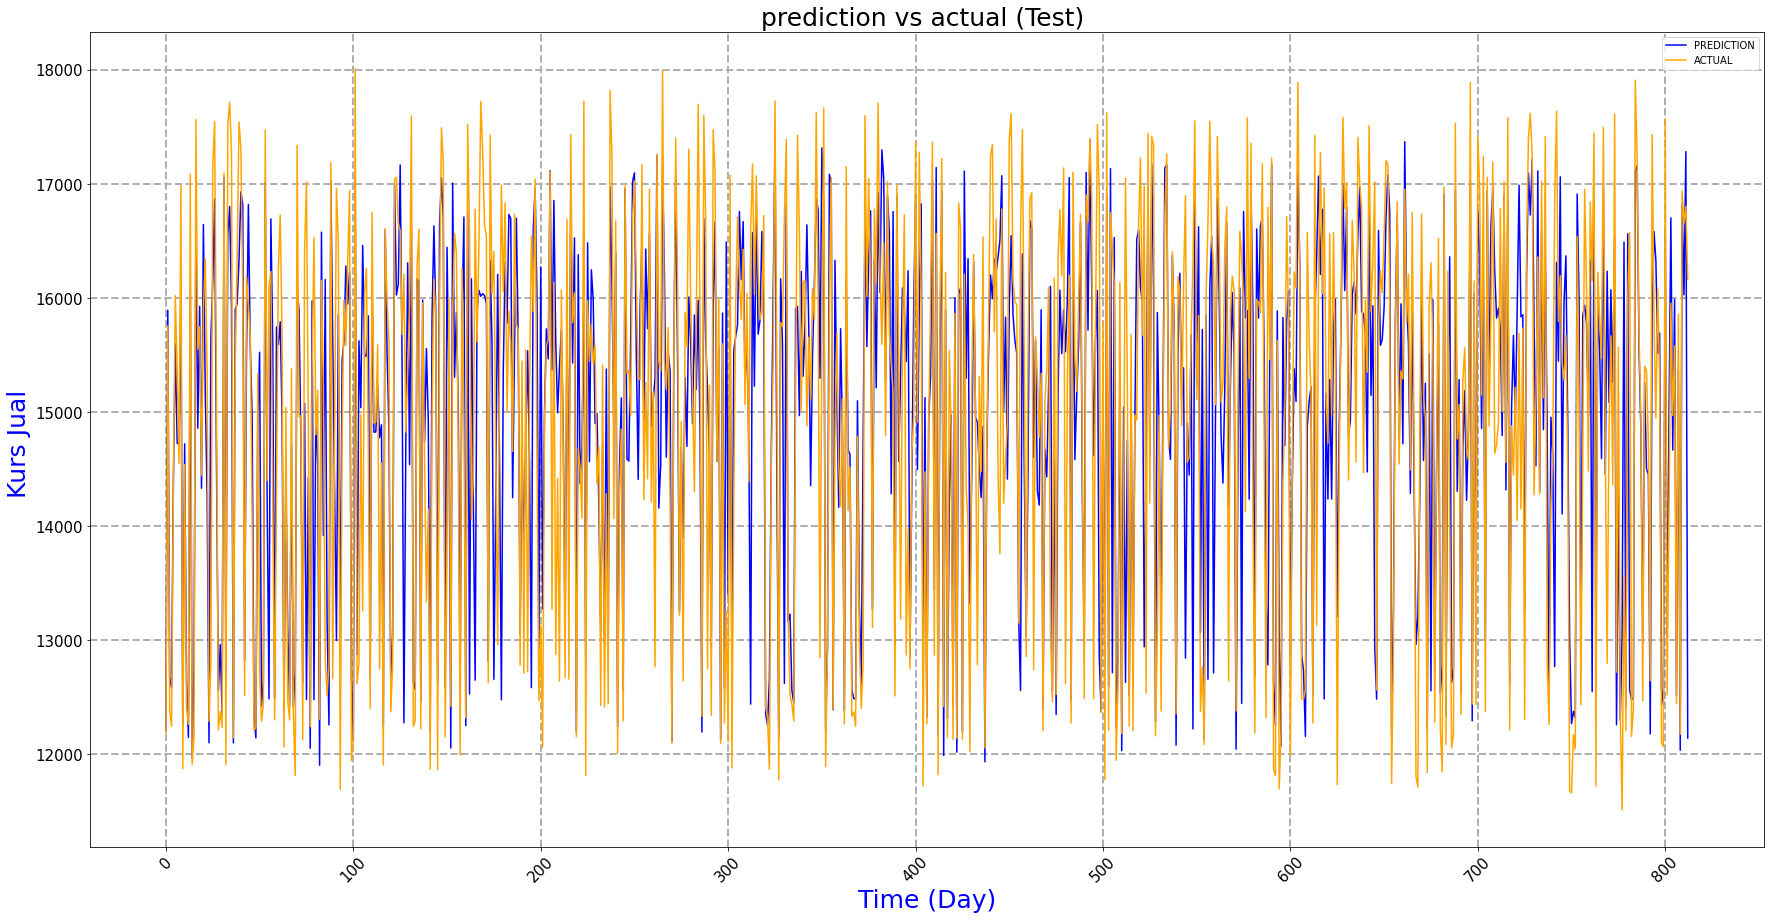

In [33]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest,label='PREDICTION', color='blue')
plt.plot(nilai_test,label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) ', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

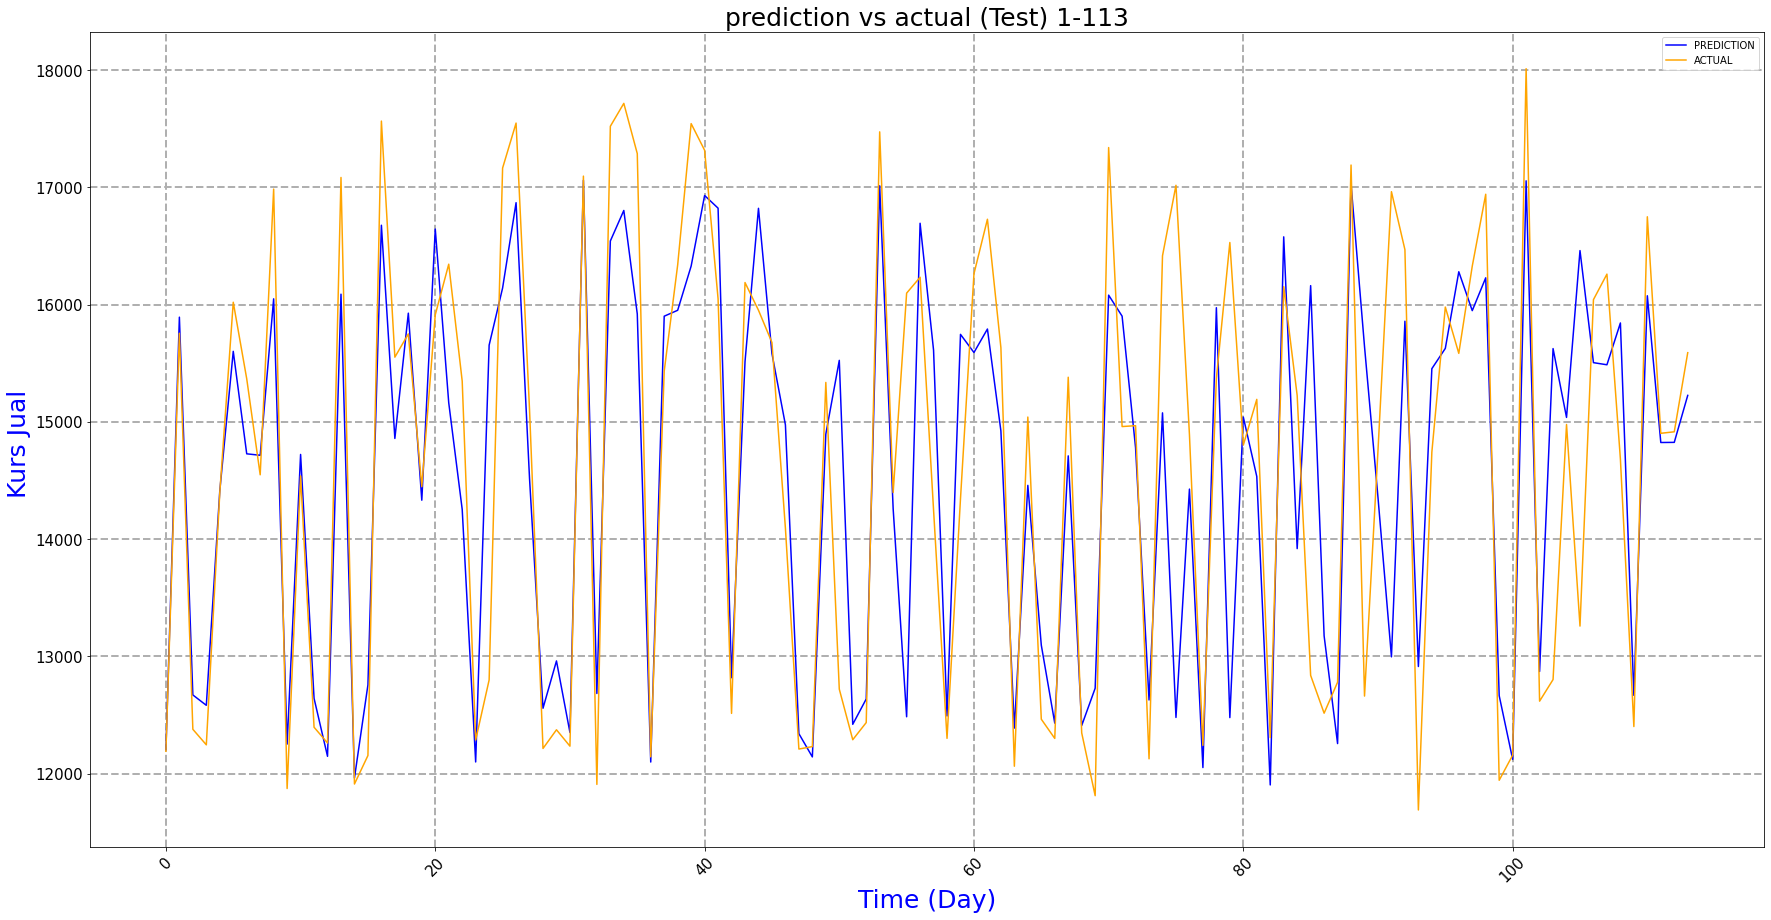

In [34]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[0:114],label='PREDICTION', color='blue')
plt.plot(nilai_test[0:114],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 1-113', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

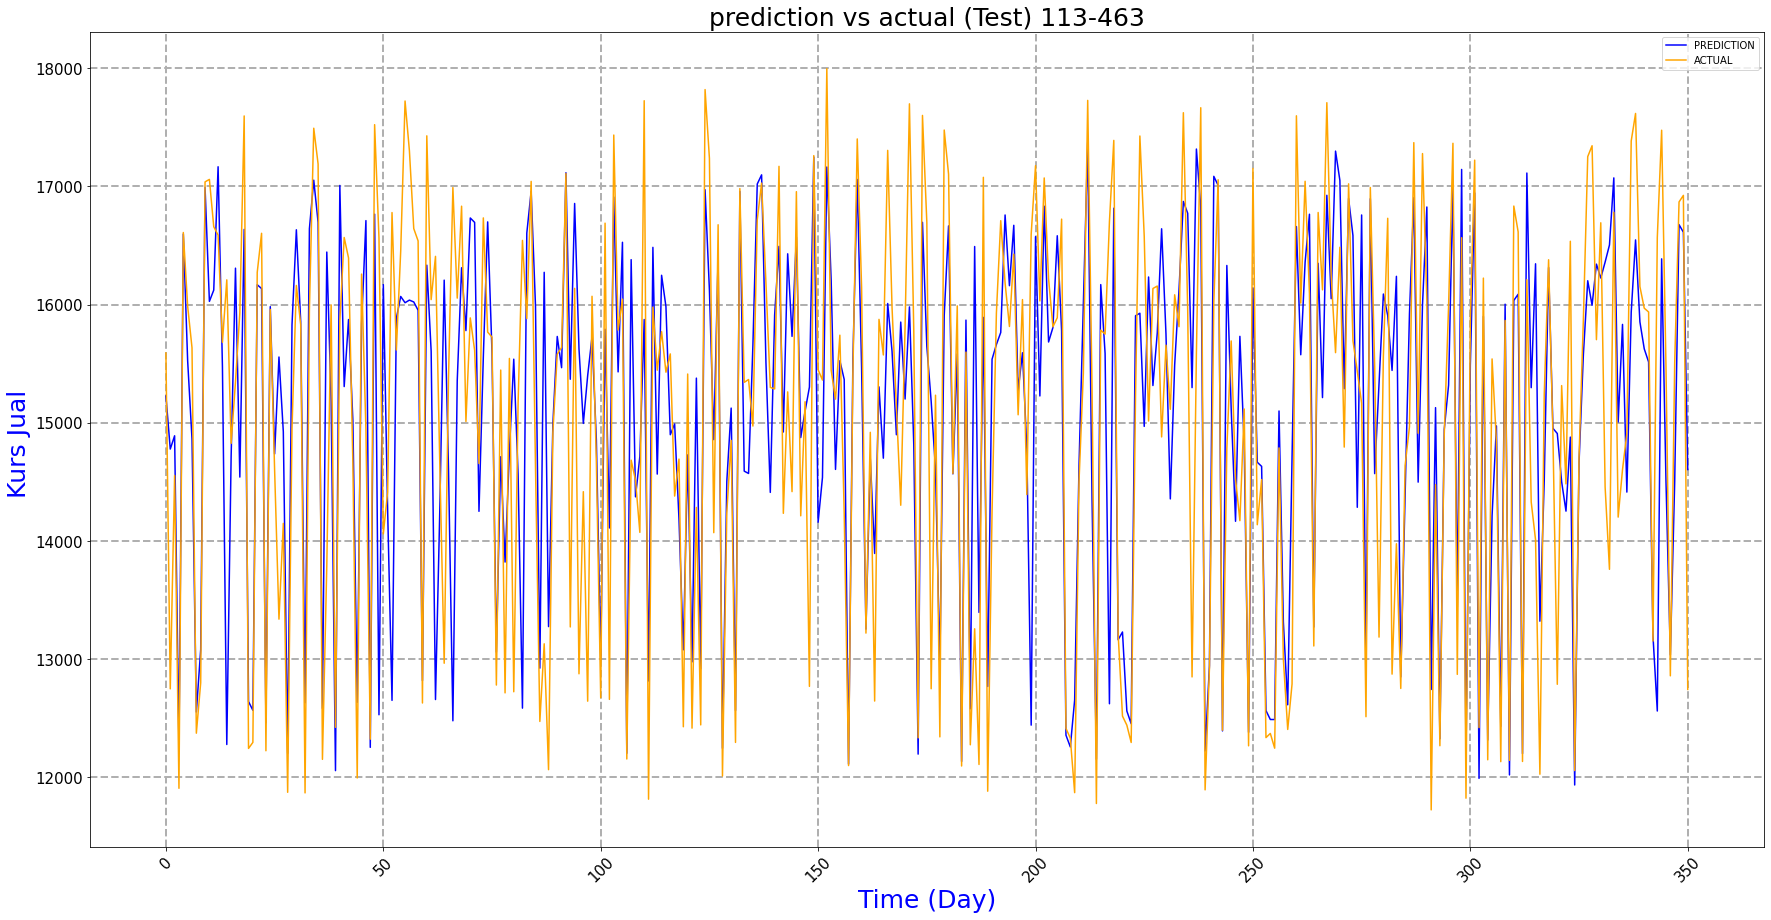

In [35]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[113:464],label='PREDICTION', color='blue')
plt.plot(nilai_test[113:464],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 113-463', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

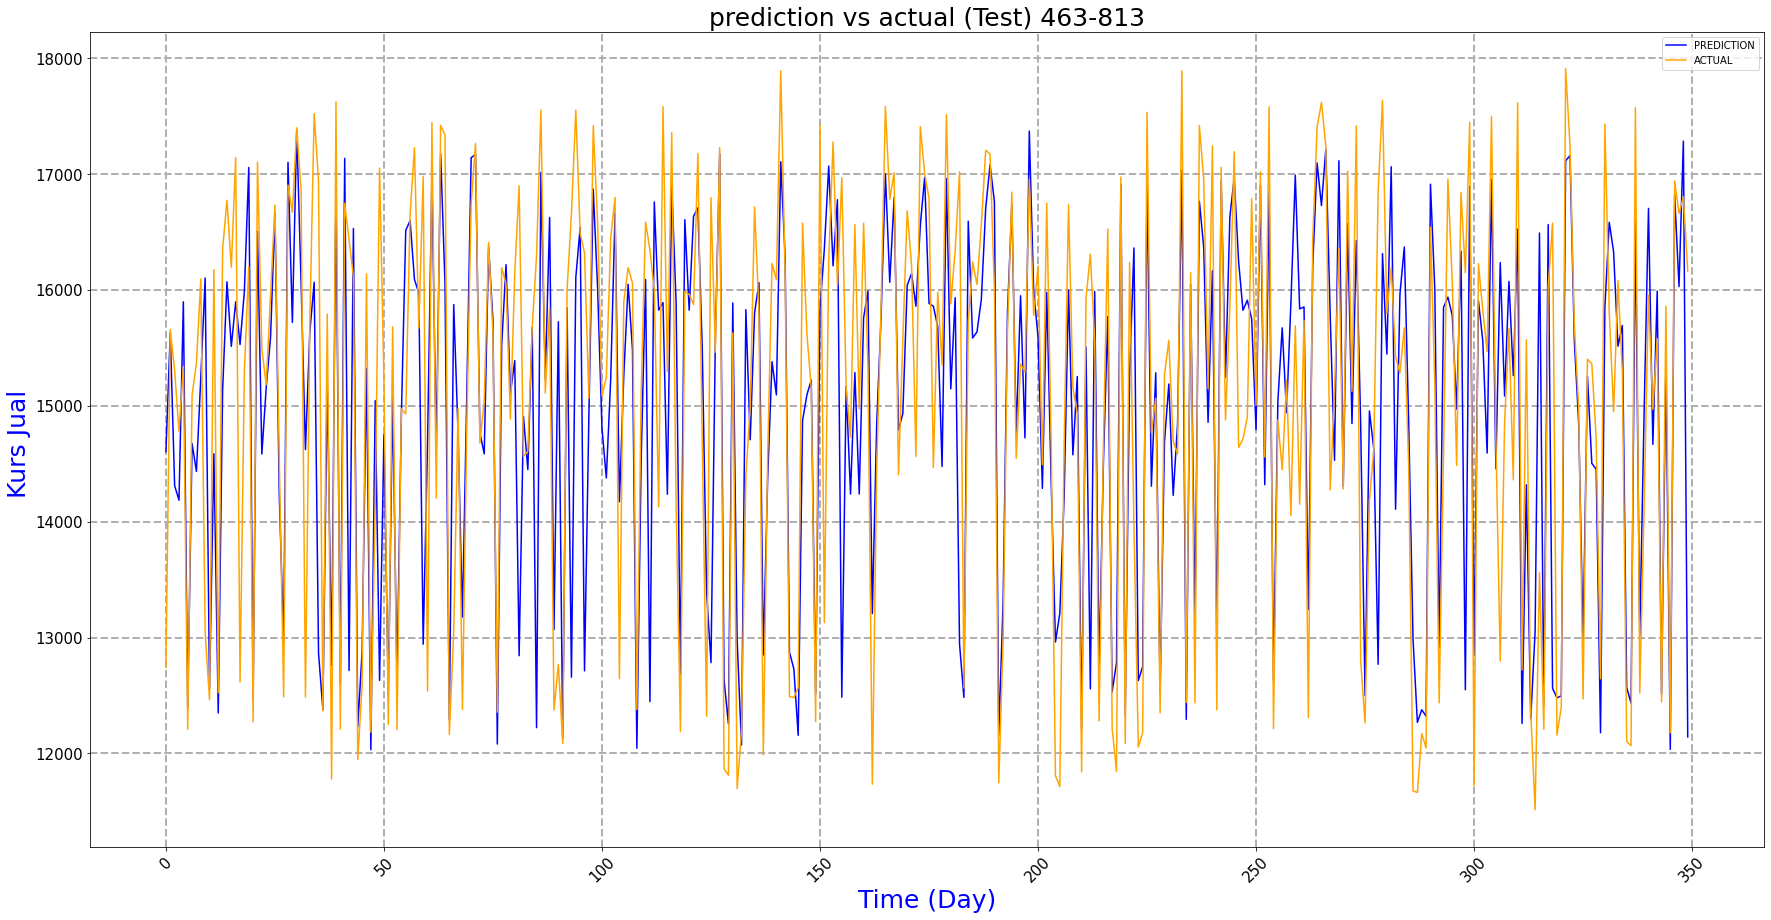

In [36]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[463:814],label='PREDICTION', color='blue')
plt.plot(nilai_test[463:814],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 463-813', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

### Plot Prediksi VS Aktual (Dataset Kurs Jual)

In [37]:
Prediksi_Kurs = model100_svr.predict(KursJual_scale)
print(Prediksi_Kurs.reshape(-1,1))

[[0.11061935]
 [0.11743823]
 [0.11193399]
 ...
 [0.65628597]
 [0.65384629]
 [0.65706541]]


In [38]:
NilaiPrediction_Kurs = scalerX.inverse_transform(Prediksi_Kurs.reshape(-1,1))
print(NilaiPrediction_Kurs)

[[12276.70416173]
 [12323.7766561 ]
 [12285.77946641]
 ...
 [16043.58265465]
 [16026.74094223]
 [16048.96338527]]


<function matplotlib.pyplot.show(*args, **kw)>

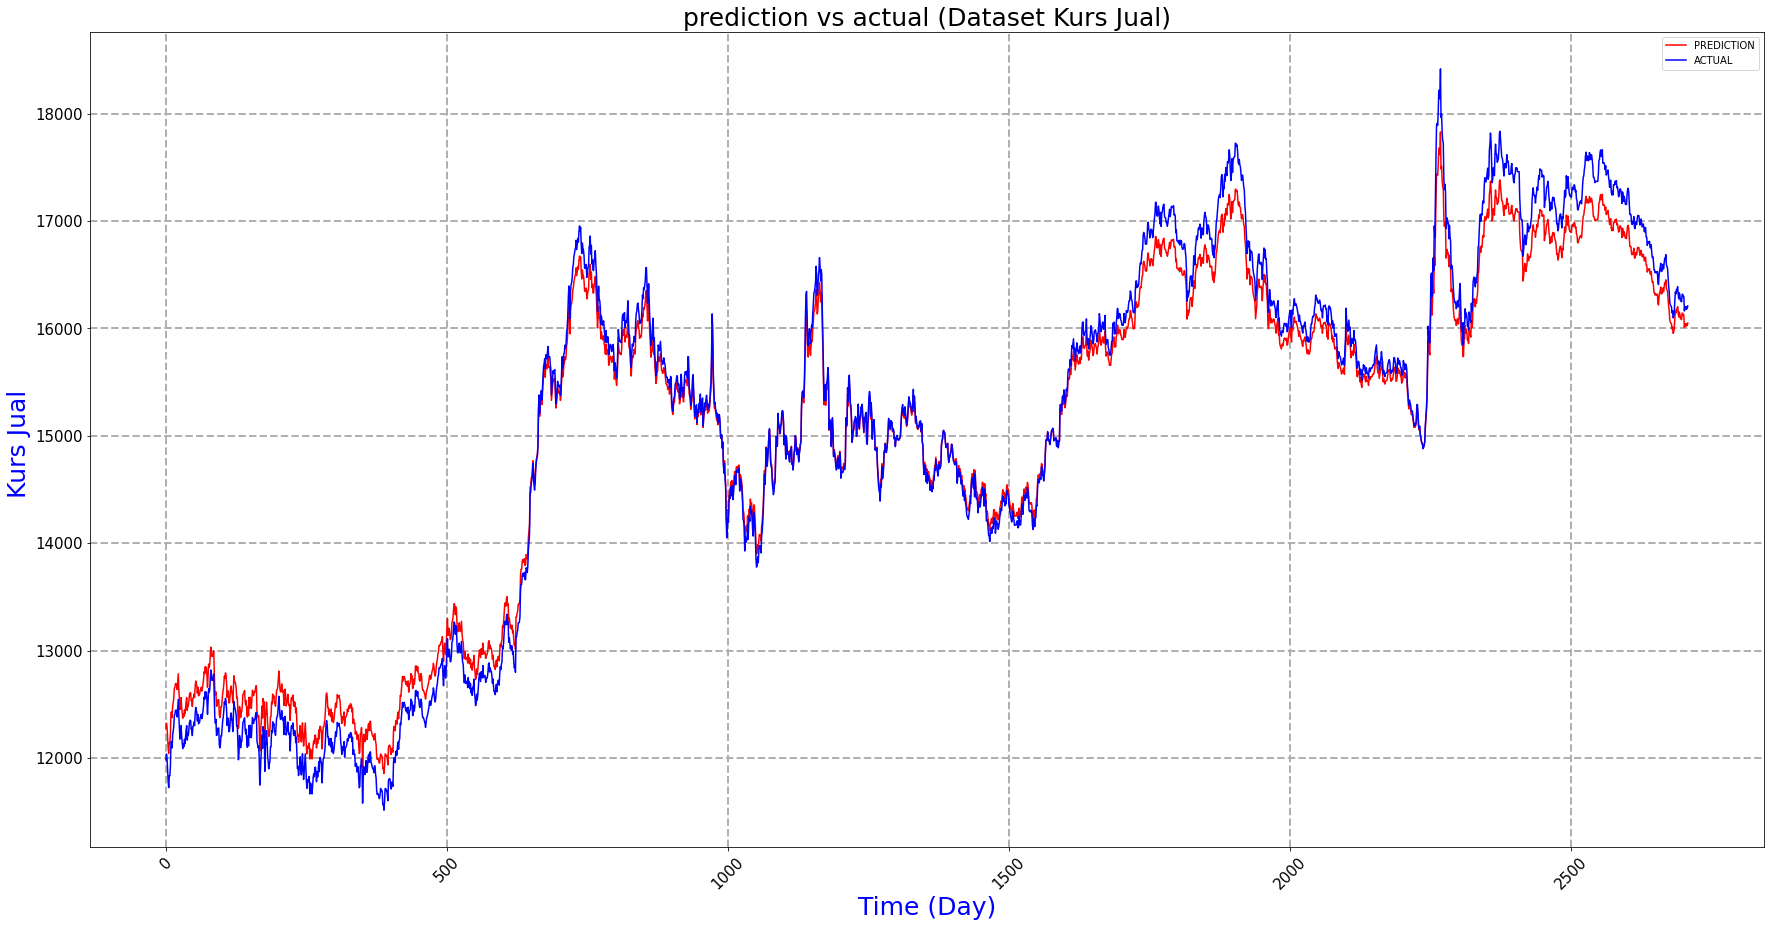

In [39]:
plt.figure(figsize=(30,15))
plt.plot(NilaiPrediction_Kurs,label='PREDICTION', color='red')
plt.plot(df['Kurs Jual'],label='ACTUAL', color='blue' )
plt.title('prediction vs actual (Dataset Kurs Jual)', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

In [40]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(KursJual_scale, Prediksi_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(KursJual_scale, Prediksi_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(KursJual_scale, Prediksi_Kurs)))

MSE  Prediksi : 0.00094
RMSE  Prediksi : 0.03058
R^2 Prediksi : 0.98547


In [41]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Kurs_Jual, NilaiPrediction_Kurs)))

MSE  Prediksi : 44561.01650
RMSE  Prediksi : 211.09480
R^2 Prediksi : 0.98547


# Prediksi 100 hari

In [42]:
prediction_100days = model100_svr.predict(Actual100_scale)
prediction_100days = prediction_100days.reshape(-1,1)
print(prediction_100days)

[[0.84707538]
 [0.86539386]
 [0.85735055]
 [0.90617731]
 [0.82722944]
 [0.81441697]
 [0.84984481]
 [0.86914966]
 [0.84602237]
 [0.88703956]
 [0.91499908]
 [0.90986262]
 [0.91373636]
 [0.87336697]
 [0.84261229]
 [0.87488098]
 [0.8880353 ]
 [0.85748955]
 [0.82835144]
 [0.8379894 ]
 [0.85095301]
 [0.82127593]
 [0.78882848]
 [0.82316809]
 [0.82299312]
 [0.74815732]
 [0.74922752]
 [0.68016508]
 [0.70446766]
 [0.70965462]
 [0.69927937]
 [0.7131857 ]
 [0.66200125]
 [0.65946746]
 [0.68505327]
 [0.61731934]
 [0.5782651 ]
 [0.58528577]
 [0.5445102 ]
 [0.47117814]
 [0.47025334]
 [0.44676217]
 [0.45585961]
 [0.4487682 ]
 [0.44642466]
 [0.45723581]
 [0.36317749]
 [0.34289705]
 [0.4295101 ]
 [0.46642189]
 [0.49276317]
 [0.52877867]
 [0.45750728]
 [0.46091366]
 [0.47192536]
 [0.51973142]
 [0.48169613]
 [0.5310517 ]
 [0.57256824]
 [0.55676228]
 [0.60264064]
 [0.51869428]
 [0.50083548]
 [0.48918828]
 [0.40212887]
 [0.3314196 ]
 [0.28285779]
 [0.18933411]
 [0.16393062]
 [0.15545014]
 [0.14702244]
 [0.09

In [43]:
NilaiPrediction_100 = scalerX.inverse_transform(prediction_100days)
print(NilaiPrediction_100.reshape(-1,1))

[[17360.65159001]
 [17487.10883646]
 [17431.58379169]
 [17768.64754651]
 [17223.64991884]
 [17135.20208346]
 [17379.7696699 ]
 [17513.03605517]
 [17353.38235229]
 [17636.53473033]
 [17829.54657378]
 [17794.08821179]
 [17820.82963594]
 [17542.14926566]
 [17329.84172611]
 [17552.60088951]
 [17643.40855345]
 [17432.54331295]
 [17231.39533771]
 [17297.92873069]
 [17387.41990676]
 [17182.55130868]
 [16958.55811502]
 [17195.61331688]
 [17194.40547952]
 [16677.79446902]
 [16685.18236977]
 [16208.42635808]
 [16376.19344406]
 [16412.00033019]
 [16340.37730535]
 [16436.37631744]
 [16083.03676367]
 [16065.54532159]
 [16242.17086241]
 [15774.58589513]
 [15504.98431818]
 [15553.44982305]
 [15271.96546665]
 [14765.73522099]
 [14759.35105597]
 [14597.18545061]
 [14659.98738137]
 [14611.0335339 ]
 [14594.85547953]
 [14669.48769688]
 [14020.17861557]
 [13880.17746505]
 [14478.08989236]
 [14732.90157314]
 [14914.74230618]
 [15163.36660985]
 [14671.36167828]
 [14694.87686073]
 [14770.8934493 ]
 [15100.91

In [44]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Actual100_scale, prediction_100days)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Actual100_scale, prediction_100days))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Actual100_scale, prediction_100days)))

MSE  Prediksi : 0.00170
RMSE  Prediksi : 0.04125
R^2 Prediksi : 0.98202


In [45]:
print('MSE  Prediksi : {0:.3f}'.format(mean_squared_error(actual_100days_array, NilaiPrediction_100)))
print('RMSE  Prediksi : {0:.3f}'.format(math.sqrt(mean_squared_error(actual_100days_array, NilaiPrediction_100))))
print('R^2 Prediksi : {0:.3f}'.format(r2_score(actual_100days_array, NilaiPrediction_100)))

MSE  Prediksi : 5028702.730
RMSE  Prediksi : 2242.477
R^2 Prediksi : -57.335
